이제 모델링을 해볼 차례.\
여기서 성능이 원하는 만큼 나오지 않으면 다시 EDA를 해야함.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
import xgboost
from xgboost import XGBClassifier

In [2]:
plt.rcParams['font.family'] = 'Malgun Gothic'

In [3]:
df = pd.read_csv('./train_delete_outlier.csv')
df

,연간 소득,신용 거래 연수,월 상환 부채액,최대 신용한도,현재 미상환 신용액,개설된 신용계좌 수,현재 대출 잔액,마지막 연체 이후 경과 개월 수,신용 점수,체납 세금 압류 횟수,신용 문제 발생 횟수,개인 파산 횟수,credit_rating_range,current_range_employment,purpose,house_type,채무 불이행 여부,loan repayment period
0,1941337.5,13.4,8806.5,400597.5,225457.5,9.0,390903.0,24.0,767.0,0.0,0,1,700,10,14,0,0,0
1,1356381.0,18.8,12069.0,491770.5,487644.0,12.0,227775.0,74.0,800.0,0.0,1,3,700,4,14,1,1,0
2,1049017.5,14.8,31749.0,411546.0,413211.0,15.0,251383.5,22.0,796.0,0.0,1,1,700,6,14,1,1,0
3,1410700.5,24.4,16842.0,692352.0,154974.0,8.0,479349.0,19.0,807.0,0.0,0,0,800,2,13,2,0,1
4,1636863.0,9.8,28818.0,154429.5,11943.0,9.0,370210.5,11.0,713.0,0.0,0,0,700,3,12,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5983,1726114.5,18.3,5043.0,1035360.0,16635.0,8.0,280647.0,24.0,731.0,1.0,5,0,700,1,14,0,0,0
5984,1294200.0,17.5,6700.5,266356.5,12522.0,13.0,262972.5,7.0,798.0,5.0,0,0,700,2,10,0,0,0
5985,1327737.0,14.2,8163.0,100882.5,141427.5,10.0,480877.5,32.0,649.0,0.0,0,0,600,7,14,0,0,1
5986,1198722.0,17.4,3919.5,683016.0,383376.0,10.0,521730.0,25.0,742.0,0.0,1,1,700,8,14,1,1,0


In [4]:
x = df.drop(labels=['채무 불이행 여부'], axis = 1)
x

,연간 소득,신용 거래 연수,월 상환 부채액,최대 신용한도,현재 미상환 신용액,개설된 신용계좌 수,현재 대출 잔액,마지막 연체 이후 경과 개월 수,신용 점수,체납 세금 압류 횟수,신용 문제 발생 횟수,개인 파산 횟수,credit_rating_range,current_range_employment,purpose,house_type,loan repayment period
0,1941337.5,13.4,8806.5,400597.5,225457.5,9.0,390903.0,24.0,767.0,0.0,0,1,700,10,14,0,0
1,1356381.0,18.8,12069.0,491770.5,487644.0,12.0,227775.0,74.0,800.0,0.0,1,3,700,4,14,1,0
2,1049017.5,14.8,31749.0,411546.0,413211.0,15.0,251383.5,22.0,796.0,0.0,1,1,700,6,14,1,0
3,1410700.5,24.4,16842.0,692352.0,154974.0,8.0,479349.0,19.0,807.0,0.0,0,0,800,2,13,2,1
4,1636863.0,9.8,28818.0,154429.5,11943.0,9.0,370210.5,11.0,713.0,0.0,0,0,700,3,12,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5983,1726114.5,18.3,5043.0,1035360.0,16635.0,8.0,280647.0,24.0,731.0,1.0,5,0,700,1,14,0,0
5984,1294200.0,17.5,6700.5,266356.5,12522.0,13.0,262972.5,7.0,798.0,5.0,0,0,700,2,10,0,0
5985,1327737.0,14.2,8163.0,100882.5,141427.5,10.0,480877.5,32.0,649.0,0.0,0,0,600,7,14,0,1
5986,1198722.0,17.4,3919.5,683016.0,383376.0,10.0,521730.0,25.0,742.0,0.0,1,1,700,8,14,1,0


In [5]:
y = df[['채무 불이행 여부']]
y

,채무 불이행 여부
0,0
1,1
2,1
3,0
4,1
...,...
5983,0
5984,0
5985,0
5986,1


In [6]:
train_x, test_x, train_y, test_y = train_test_split(x, y, train_size=0.7, random_state = 42) 

In [7]:
train_y

,채무 불이행 여부
1187,0
5081,1
2646,1
1030,1
2244,0
...,...
3772,1
5191,1
5226,1
5390,0


In [8]:
dtrain = xgboost.DMatrix(data = train_x, label = train_y)
dtest = xgboost.DMatrix(data = test_x, label = test_y)

In [9]:
xgbc = XGBClassifier()
xgbc_params = {
    'n_estimators':[100, 200, 300, 400, 500],
    'learning_rate':[0.01, 0.05, 0.1],
    'max_depth':[2, 3, 4, 5]
}

In [10]:
xgb_grid = GridSearchCV(xgbc, param_grid=xgbc_params, scoring = 'roc_auc', cv = 5)
xgb_grid.fit(train_x, train_y)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, feature_weights=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=Non...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [2, 3, 4, 5],
                         'n_estimators': [100, 200, 300, 400, 500]},
             scoring='roc_auc')

In [11]:
xgb_grid.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=2,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, ...)

In [12]:
xgb_grid.best_params_

{'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 200}

In [13]:
xgb_grid.best_score_

0.7384885611943774

In [14]:
xgb_esti = xgb_grid.best_estimator_

In [15]:
pred = xgb_esti.predict(test_x)

In [16]:
from sklearn.metrics import roc_auc_score
print('ROC_AUC_SCORE : {0:.5f}'.format(roc_auc_score(test_y, pred)))

ROC_AUC_SCORE : 0.66695


In [17]:
test_df = pd.read_csv('./test.csv')
test_df

,UID,주거 형태,연간 소득,현재 직장 근속 연수,체납 세금 압류 횟수,개설된 신용계좌 수,신용 거래 연수,최대 신용한도,신용 문제 발생 횟수,마지막 연체 이후 경과 개월 수,개인 파산 횟수,대출 목적,대출 상환 기간,현재 대출 잔액,현재 미상환 신용액,월 상환 부채액,신용 점수
0,TEST_0000,월세,1560090.0,10년 이상,0.0,13,12.0,495561.0,0,18,0,기타,단기 상환,376332.0,133522.5,29641.5,736
1,TEST_0001,주택 담보 대출 (거주 중),2102616.0,2년,0.0,9,29.0,580833.0,0,40,0,부채 통합,장기 상환,830379.0,302983.5,20151.0,718
2,TEST_0002,주택 담보 대출 (거주 중),2477989.5,10년 이상,0.0,11,26.5,995841.0,0,44,0,부채 통합,장기 상환,877635.0,379278.0,13113.0,722
3,TEST_0003,주택 담보 대출 (거주 중),1571091.0,6년,0.0,7,34.4,601656.0,0,45,0,부채 통합,단기 상환,487278.0,275395.5,11679.0,762
4,TEST_0004,주택 담보 대출 (거주 중),2290260.0,10년 이상,0.0,19,25.0,1954623.0,0,14,0,부채 통합,단기 상환,397782.0,742767.0,42370.5,775
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2057,TEST_2057,월세,698107.5,5년,0.0,5,7.7,77616.0,0,33,0,주택 개보수,단기 상환,194007.0,13081.5,20302.5,778
2058,TEST_2058,주택 담보 대출 (거주 중),2092413.0,10년 이상,0.0,15,27.2,2162094.0,0,35,0,부채 통합,단기 상환,1130646.0,745047.0,25458.0,804
2059,TEST_2059,자가,2052000.0,10년 이상,0.0,20,26.7,1346763.0,0,69,0,부채 통합,단기 상환,1025475.0,775798.5,44802.0,705
2060,TEST_2060,주택 담보 대출 (거주 중),4249777.5,6년,0.0,18,21.3,420255.0,0,6,0,부채 통합,단기 상환,656106.0,163333.5,91725.0,735


In [18]:
df

,연간 소득,신용 거래 연수,월 상환 부채액,최대 신용한도,현재 미상환 신용액,개설된 신용계좌 수,현재 대출 잔액,마지막 연체 이후 경과 개월 수,신용 점수,체납 세금 압류 횟수,신용 문제 발생 횟수,개인 파산 횟수,credit_rating_range,current_range_employment,purpose,house_type,채무 불이행 여부,loan repayment period
0,1941337.5,13.4,8806.5,400597.5,225457.5,9.0,390903.0,24.0,767.0,0.0,0,1,700,10,14,0,0,0
1,1356381.0,18.8,12069.0,491770.5,487644.0,12.0,227775.0,74.0,800.0,0.0,1,3,700,4,14,1,1,0
2,1049017.5,14.8,31749.0,411546.0,413211.0,15.0,251383.5,22.0,796.0,0.0,1,1,700,6,14,1,1,0
3,1410700.5,24.4,16842.0,692352.0,154974.0,8.0,479349.0,19.0,807.0,0.0,0,0,800,2,13,2,0,1
4,1636863.0,9.8,28818.0,154429.5,11943.0,9.0,370210.5,11.0,713.0,0.0,0,0,700,3,12,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5983,1726114.5,18.3,5043.0,1035360.0,16635.0,8.0,280647.0,24.0,731.0,1.0,5,0,700,1,14,0,0,0
5984,1294200.0,17.5,6700.5,266356.5,12522.0,13.0,262972.5,7.0,798.0,5.0,0,0,700,2,10,0,0,0
5985,1327737.0,14.2,8163.0,100882.5,141427.5,10.0,480877.5,32.0,649.0,0.0,0,0,600,7,14,0,0,1
5986,1198722.0,17.4,3919.5,683016.0,383376.0,10.0,521730.0,25.0,742.0,0.0,1,1,700,8,14,1,1,0


In [19]:
test_df['house_type'] = np.where(test_df['주거 형태'] == '자가', 0,
                                np.where(test_df['주거 형태'] == '월세', 1,
                                np.where(test_df['주거 형태'] == '주택 담보 대출 (거주 중)', 2, 3)))

In [20]:
test_df['purpose'] = np.where(test_df['대출 목적'] == '부채 통합', 14,
                            np.where(test_df['대출 목적'] == '자동차 구매', 13,
                            np.where(test_df['대출 목적'] == '기타', 12,
                            np.where(test_df['대출 목적'] == '사업 대출', 11,
                            np.where(test_df['대출 목적'] == '주택 개보수', 10,
                            np.where(test_df['대출 목적'] == '여행 자금', 9,
                            np.where(test_df['대출 목적'] == '소규모 사업 자금', 8,
                            np.where(test_df['대출 목적'] == '교육비', 7,
                            np.where(test_df['대출 목적'] == '의료비', 6,
                            np.where(test_df['대출 목적'] == '결혼 자금', 5,
                            np.where(test_df['대출 목적'] == '고액 구매', 4,
                            np.where(test_df['대출 목적'] == '주택 구매', 3,
                            np.where(test_df['대출 목적'] == '이사 비용', 2, 1)))))))))))))

In [21]:
test_df['current_range_employment'] = np.where(test_df['현재 직장 근속 연수'] == '10년 이상', 10,
                                            np.where(test_df['현재 직장 근속 연수'] == '9년', 9,
                                            np.where(test_df['현재 직장 근속 연수'] == '8년', 8,
                                            np.where(test_df['현재 직장 근속 연수'] == '7년', 7,
                                            np.where(test_df['현재 직장 근속 연수'] == '6년', 6,
                                            np.where(test_df['현재 직장 근속 연수'] == '5년', 5,
                                            np.where(test_df['현재 직장 근속 연수'] == '4년', 4,
                                            np.where(test_df['현재 직장 근속 연수'] == '3년', 3,
                                            np.where(test_df['현재 직장 근속 연수'] == '2년', 2,
                                            np.where(test_df['현재 직장 근속 연수'] == '1년', 1, 0))))))))))

In [22]:
test_df['credit_rating_range'] = np.where(test_df['신용 점수'] > 800, 800,
                                    np.where(test_df['신용 점수'] > 700, 700,
                                    np.where(test_df['신용 점수'] > 600, 600,
                                    np.where(test_df['신용 점수'] > 500, 500,
                                    np.where(test_df['신용 점수'] > 400, 400,
                                    np.where(test_df['신용 점수'] > 300, 300,
                                    np.where(test_df['신용 점수'] > 200, 200, 100)))))))

In [23]:
test_df['loan repayment period'] = np.where(test_df['대출 상환 기간'] == '단기 상환', 0, 1)

In [24]:
test_df.columns

Index(['UID', '주거 형태', '연간 소득', '현재 직장 근속 연수', '체납 세금 압류 횟수', '개설된 신용계좌 수',
       '신용 거래 연수', '최대 신용한도', '신용 문제 발생 횟수', '마지막 연체 이후 경과 개월 수', '개인 파산 횟수',
       '대출 목적', '대출 상환 기간', '현재 대출 잔액', '현재 미상환 신용액', '월 상환 부채액', '신용 점수',
       'house_type', 'purpose', 'current_range_employment',
       'credit_rating_range', 'loan repayment period'],
      dtype='object')

In [25]:
df.columns

Index(['연간 소득', '신용 거래 연수', '월 상환 부채액', '최대 신용한도', '현재 미상환 신용액', '개설된 신용계좌 수',
       '현재 대출 잔액', '마지막 연체 이후 경과 개월 수', '신용 점수', '체납 세금 압류 횟수', '신용 문제 발생 횟수',
       '개인 파산 횟수', 'credit_rating_range', 'current_range_employment',
       'purpose', 'house_type', '채무 불이행 여부', 'loan repayment period'],
      dtype='object')

In [26]:
test_df_copy = test_df.copy()

In [27]:
test_df_c = test_df_copy[['연간 소득', '신용 거래 연수', '월 상환 부채액', '최대 신용한도', '현재 미상환 신용액', '개설된 신용계좌 수',
       '현재 대출 잔액', '마지막 연체 이후 경과 개월 수', '신용 점수', '체납 세금 압류 횟수', '신용 문제 발생 횟수',
       '개인 파산 횟수', 'credit_rating_range', 'current_range_employment',
       'purpose', 'house_type', 'loan repayment period']]

In [28]:
test_df_c

,연간 소득,신용 거래 연수,월 상환 부채액,최대 신용한도,현재 미상환 신용액,개설된 신용계좌 수,현재 대출 잔액,마지막 연체 이후 경과 개월 수,신용 점수,체납 세금 압류 횟수,신용 문제 발생 횟수,개인 파산 횟수,credit_rating_range,current_range_employment,purpose,house_type,loan repayment period
0,1560090.0,12.0,29641.5,495561.0,133522.5,13,376332.0,18,736,0.0,0,0,700,10,12,1,0
1,2102616.0,29.0,20151.0,580833.0,302983.5,9,830379.0,40,718,0.0,0,0,700,2,14,2,1
2,2477989.5,26.5,13113.0,995841.0,379278.0,11,877635.0,44,722,0.0,0,0,700,10,14,2,1
3,1571091.0,34.4,11679.0,601656.0,275395.5,7,487278.0,45,762,0.0,0,0,700,6,14,2,0
4,2290260.0,25.0,42370.5,1954623.0,742767.0,19,397782.0,14,775,0.0,0,0,700,10,14,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2057,698107.5,7.7,20302.5,77616.0,13081.5,5,194007.0,33,778,0.0,0,0,700,5,10,1,0
2058,2092413.0,27.2,25458.0,2162094.0,745047.0,15,1130646.0,35,804,0.0,0,0,800,10,14,2,0
2059,2052000.0,26.7,44802.0,1346763.0,775798.5,20,1025475.0,69,705,0.0,0,0,700,10,14,0,0
2060,4249777.5,21.3,91725.0,420255.0,163333.5,18,656106.0,6,735,0.0,0,0,700,6,14,2,0


In [29]:
df

,연간 소득,신용 거래 연수,월 상환 부채액,최대 신용한도,현재 미상환 신용액,개설된 신용계좌 수,현재 대출 잔액,마지막 연체 이후 경과 개월 수,신용 점수,체납 세금 압류 횟수,신용 문제 발생 횟수,개인 파산 횟수,credit_rating_range,current_range_employment,purpose,house_type,채무 불이행 여부,loan repayment period
0,1941337.5,13.4,8806.5,400597.5,225457.5,9.0,390903.0,24.0,767.0,0.0,0,1,700,10,14,0,0,0
1,1356381.0,18.8,12069.0,491770.5,487644.0,12.0,227775.0,74.0,800.0,0.0,1,3,700,4,14,1,1,0
2,1049017.5,14.8,31749.0,411546.0,413211.0,15.0,251383.5,22.0,796.0,0.0,1,1,700,6,14,1,1,0
3,1410700.5,24.4,16842.0,692352.0,154974.0,8.0,479349.0,19.0,807.0,0.0,0,0,800,2,13,2,0,1
4,1636863.0,9.8,28818.0,154429.5,11943.0,9.0,370210.5,11.0,713.0,0.0,0,0,700,3,12,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5983,1726114.5,18.3,5043.0,1035360.0,16635.0,8.0,280647.0,24.0,731.0,1.0,5,0,700,1,14,0,0,0
5984,1294200.0,17.5,6700.5,266356.5,12522.0,13.0,262972.5,7.0,798.0,5.0,0,0,700,2,10,0,0,0
5985,1327737.0,14.2,8163.0,100882.5,141427.5,10.0,480877.5,32.0,649.0,0.0,0,0,600,7,14,0,0,1
5986,1198722.0,17.4,3919.5,683016.0,383376.0,10.0,521730.0,25.0,742.0,0.0,1,1,700,8,14,1,1,0


In [30]:
test_pred = xgb_esti.predict(test_df_c)

In [31]:
test_pred

array([0, 0, 0, ..., 0, 0, 1])

In [32]:
sample = pd.read_csv('./sample_submission.csv')

In [33]:
type(test_pred)

numpy.ndarray

In [34]:
sample

,UID,채무 불이행 확률
0,TEST_0000,0
1,TEST_0001,0
2,TEST_0002,0
3,TEST_0003,0
4,TEST_0004,0
...,...,...
2057,TEST_2057,0
2058,TEST_2058,0
2059,TEST_2059,0
2060,TEST_2060,0


In [35]:
sample['채무 불이행 확률'] = test_pred

In [36]:
sample

,UID,채무 불이행 확률
0,TEST_0000,0
1,TEST_0001,0
2,TEST_0002,0
3,TEST_0003,0
4,TEST_0004,0
...,...,...
2057,TEST_2057,0
2058,TEST_2058,0
2059,TEST_2059,0
2060,TEST_2060,0


In [37]:
sample['채무 불이행 확률'].value_counts()

채무 불이행 확률
0    1624
1     438
Name: count, dtype: int64

In [38]:
#sample.to_csv('samplesubmission1.csv', index = False)

<Axes: title={'center': 'total_cover'}, xlabel='Importance score', ylabel='Features'>

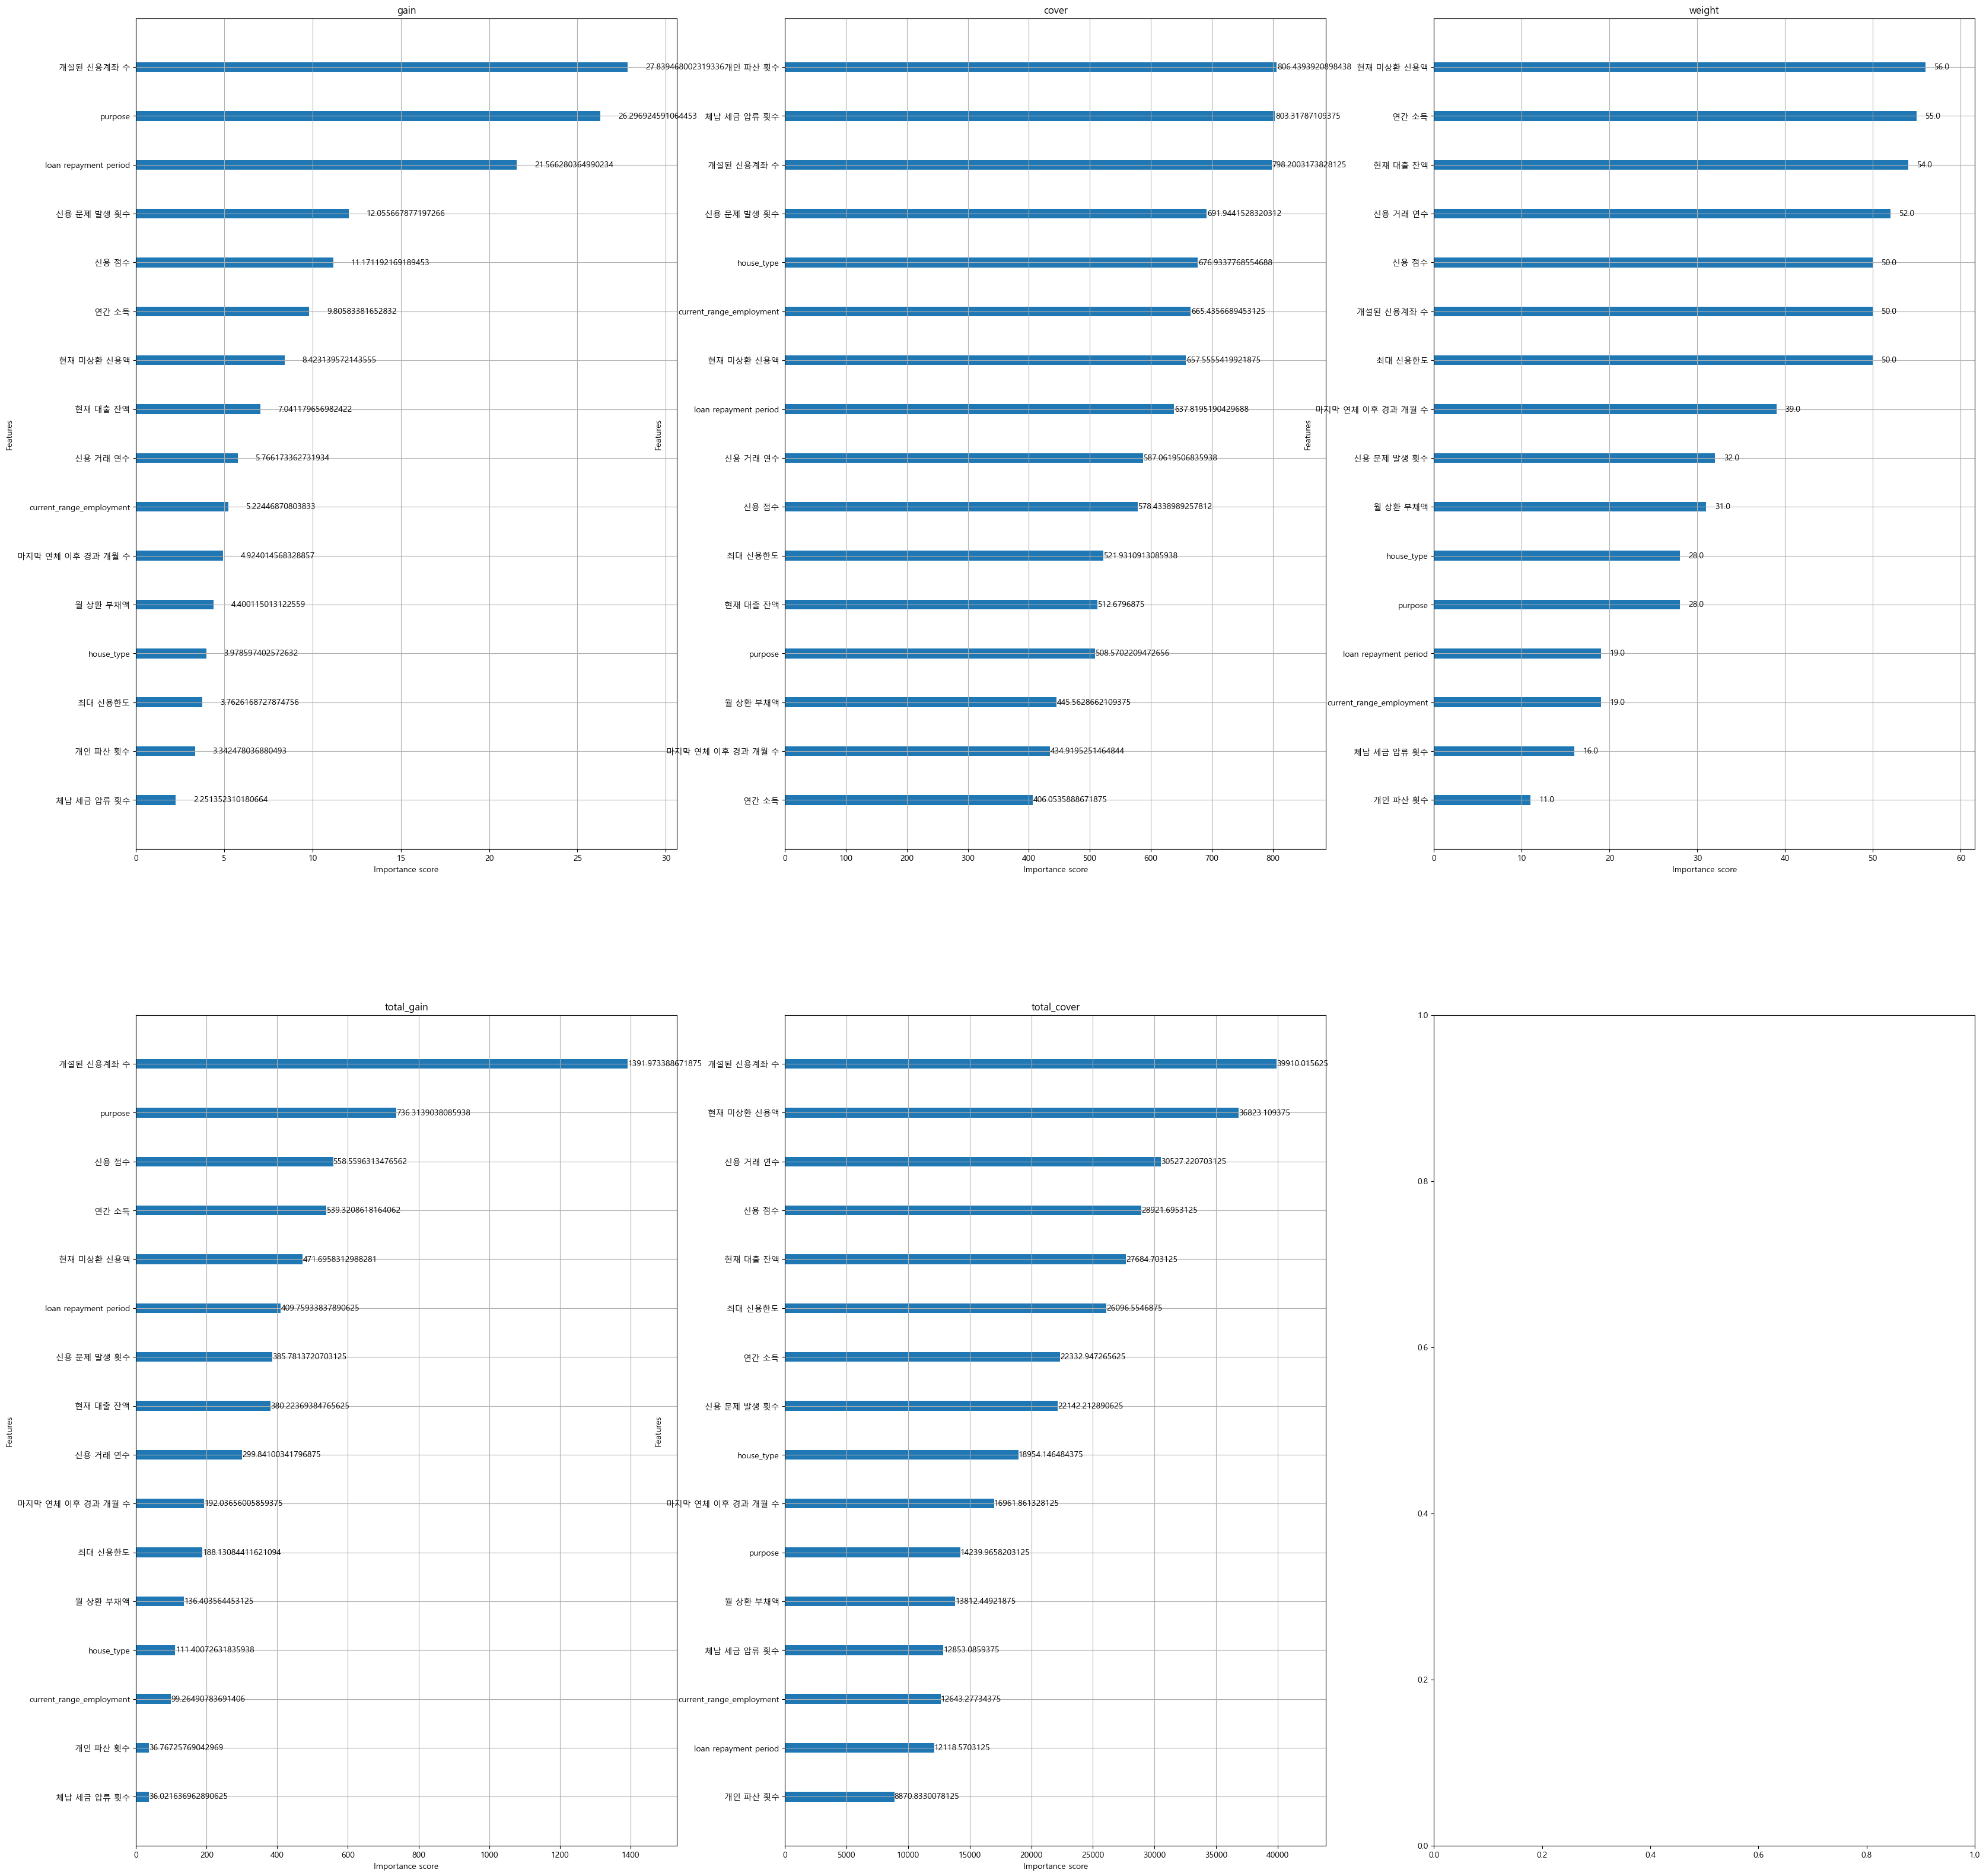

In [40]:
fig, axes = plt.subplots(2, 3, figsize = (40, 40))
xgboost.plot_importance(xgb_esti, importance_type='gain', title = 'gain', ax = axes[0, 0])
xgboost.plot_importance(xgb_esti, importance_type='cover', title = 'cover', ax = axes[0, 1])
xgboost.plot_importance(xgb_esti, importance_type='weight', title = 'weight', ax = axes[0, 2])
xgboost.plot_importance(xgb_esti, importance_type='total_gain', title = 'total_gain', ax = axes[1, 0])
xgboost.plot_importance(xgb_esti, importance_type='total_cover', title = 'total_cover', ax = axes[1, 1])

성능이 좋게 나오진 않아서 feature importance를 봤다.\
gain, cover, weight, total_gain, total_cover 다섯가지 방식으로 계산한 feature_importance를 모두 봤다.\

In [41]:
df_copy = df.copy()